In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [38]:
#количество детей на борту
child = df[df['Age'] < 18].count()[0]
print(child)

113


In [39]:
#количество людей на борту
num_pass = df.count()[0]

#поцент детей
child_percent= child / num_pass * 100
print("детей на борту ", child_percent, "%")

детей на борту  12.682379349046016 %


In [40]:
#соотношение мужчин/женщин на борту
male = df[df['Sex'] == "male"].count()[0]
female = df[df['Sex'] == "female"].count()[0]

male_pecent = male/num_pass * 100
female_pecent = female/num_pass * 100
print ("Процент мужчин на борту", male_pecent)
print ("Процент женщин на борту", female_pecent)

Процент мужчин на борту 64.75869809203144
Процент женщин на борту 35.24130190796858


In [48]:
#Посчитать по скольким людям нет информации (пола или возраста)
#df.fillna(-1)
#print(df)
#print(not_inf)
#df.isna().sum()
not_inf = df.isna().sum()[5]
#not_inf = df.isna().sum()
#print(not_inf)
print("нет информации по ", not_inf, "людям")

нет информации по  177 людям


<AxesSubplot:ylabel='Frequency'>

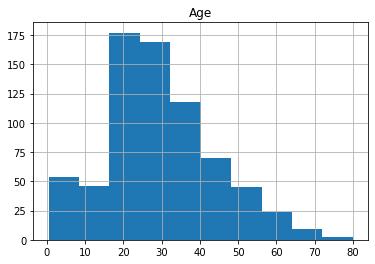

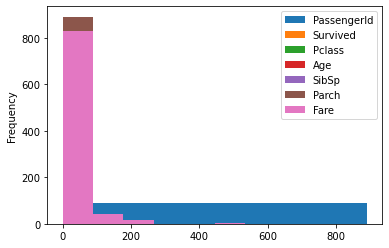

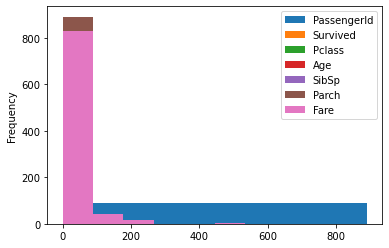

In [49]:
#Вывести гистограмму по возрасту пассажиров
df.hist(column='Age')
df.plot(kind='hist')
df.plot.hist()
#plt.hist(df['Age'], bins=50)

In [53]:
#Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.
#sv = pd.read_csv('gender_submission.csv')
#sv.drop(sv.columns[0], axis = 1,inplace = True)
#df_new = pd.concat([df, sv],axis = 1)
#df_new
df_new_fem = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
fem = df_new_fem.count()[0]
print(fem)
print("выжили", fem/female*100 ,"% женщин")

#df_new

233
выжили 74.20382165605095 % женщин


In [54]:
df_new_male = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
mal=df_new_male.count()[0]
print("выжили", mal/male*100 ,"% мужчин")
#print(mal)

выжили 18.890814558058924 % мужчин


In [56]:
df_new_child = df[(df['Age'] < 18) & (df['Survived'] == 1)]
child_surv=df_new_child.count()[0]
print("выжили", child_surv/child*100 ,"% детей")
#print(mal)

выжили 53.98230088495575 % детей


In [60]:
#Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

df[df['Age' == 'Swimming'].dropna()
df_corell=df.copy()[['Survived','Age']]
df_corell.corr(method='pearson')

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


In [61]:
#Пол и выживаемость
df_corell=df.copy()[['Survived','Sex']]
df_corell.corr(method='pearson')

,Survived
Survived,1.0
